In [2]:
import pandas as pd

# Load the advertising data
file_path = 'advertising.csv'
advertising_data = pd.read_csv('advertising.csv')

In [3]:
# Display the first few rows of the dataframe
advertising_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
# Checking for missing values and getting a basic statistical summary
missing_values = advertising_data.isnull().sum()
statistical_summary = advertising_data.describe()

missing_values, statistical_summary

(TV           0
 Radio        0
 Newspaper    0
 Sales        0
 dtype: int64,
                TV       Radio   Newspaper       Sales
 count  200.000000  200.000000  200.000000  200.000000
 mean   147.042500   23.264000   30.554000   15.130500
 std     85.854236   14.846809   21.778621    5.283892
 min      0.700000    0.000000    0.300000    1.600000
 25%     74.375000    9.975000   12.750000   11.000000
 50%    149.750000   22.900000   25.750000   16.000000
 75%    218.825000   36.525000   45.100000   19.050000
 max    296.400000   49.600000  114.000000   27.000000)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Setting up the aesthetic style of the plots
sns.set(style="whitegrid")

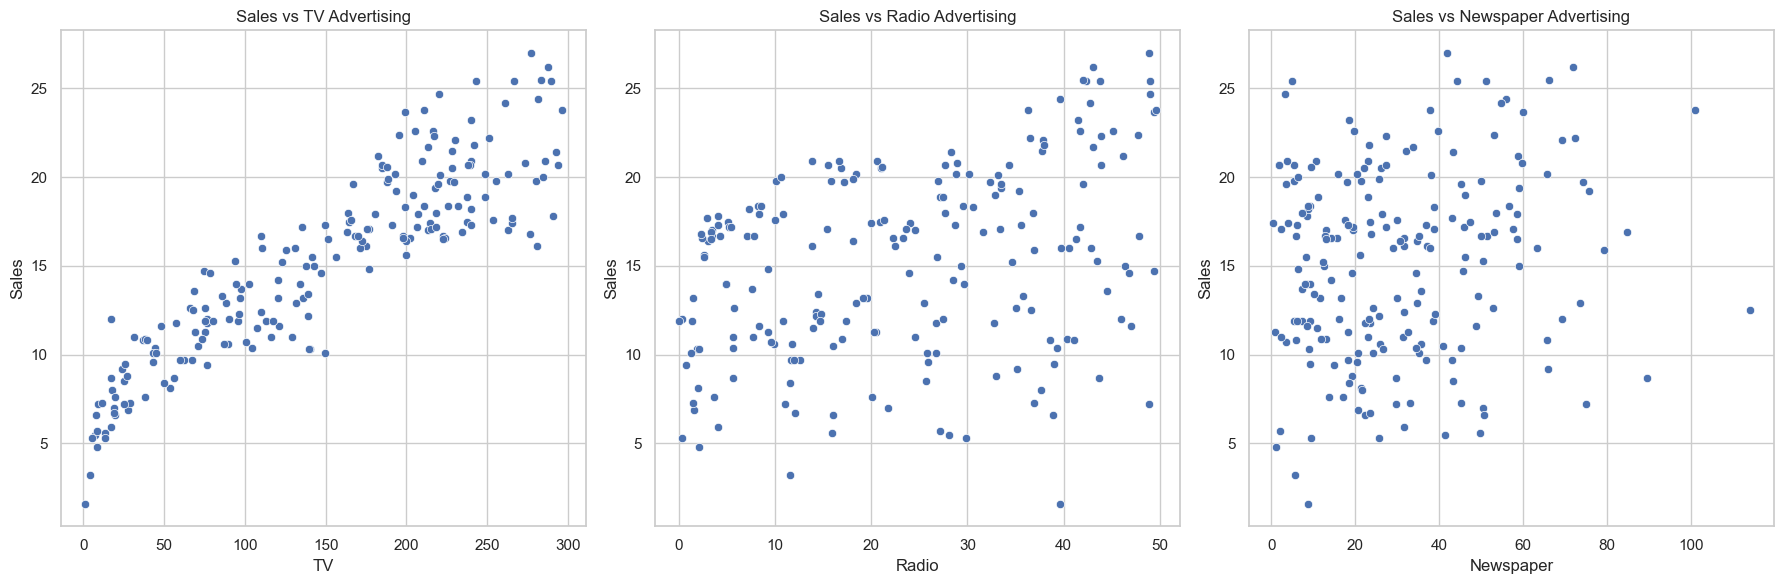

In [7]:
# Creating scatter plots for Sales vs TV, Sales vs Radio, and Sales vs Newspaper
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(x='TV', y='Sales', data=advertising_data, ax=axs[0])
axs[0].set_title('Sales vs TV Advertising')

sns.scatterplot(x='Radio', y='Sales', data=advertising_data, ax=axs[1])
axs[1].set_title('Sales vs Radio Advertising')

sns.scatterplot(x='Newspaper', y='Sales', data=advertising_data, ax=axs[2])
axs[2].set_title('Sales vs Newspaper Advertising')

plt.tight_layout()
plt.show()

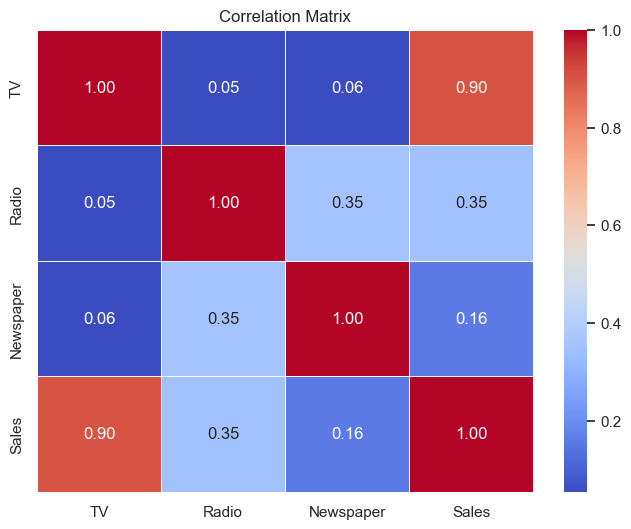

In [8]:
# Creating a heatmap for the correlation matrix
correlation_matrix = advertising_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
# Preparing the data
X = advertising_data[['TV', 'Radio']] # Features: TV and Radio
y = advertising_data['Sales'] # Target: Sales

In [11]:
# Splitting the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Model Building: Linear Regression
linear_regression_model = LinearRegression()

In [13]:
# Model Training
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Predicting Sales for the test set
y_pred = linear_regression_model.predict(X_test)

In [15]:
# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(2.8466161221315405, 0.9078797802624651)

C:\Users\Ehtisham Ijaz\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


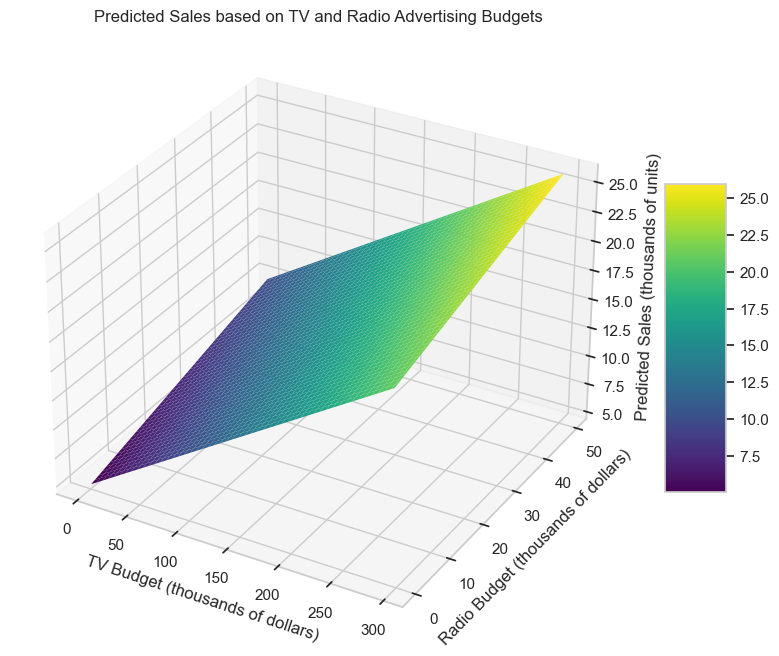

In [26]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Generating a range of values for TV and Radio budgets
tv_range = np.linspace(advertising_data['TV'].min(), advertising_data['TV'].max(), 100)
radio_range = np.linspace(advertising_data['Radio'].min(), advertising_data['Radio'].max(), 100)

# Creating a meshgrid for plotting
tv_grid, radio_grid = np.meshgrid(tv_range, radio_range)

# Predicting sales for each combination of TV and Radio budgets
model_input = np.array([tv_grid.ravel(), radio_grid.ravel()]).T
predicted_sales = linear_regression_model.predict(model_input).reshape(tv_grid.shape)

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Creating a surface plot
surf = ax.plot_surface(tv_grid, radio_grid, predicted_sales, cmap='viridis', edgecolor='none')

# Adding labels and title
ax.set_xlabel('TV Budget (thousands of dollars)')
ax.set_ylabel('Radio Budget (thousands of dollars)')
ax.set_zlabel('Predicted Sales (thousands of units)')
ax.set_title('Predicted Sales based on TV and Radio Advertising Budgets')

# Adding a color bar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.show()